<a href="https://colab.research.google.com/github/kashish1203/minecrafters/blob/Riya/FINAL_ARIMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [130]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA

In [3]:
df = pd.read_csv('/content/drive/MyDrive/MetroPT3(AirCompressor).csv')

In [131]:
df.head(4)

,Unnamed: 0,timestamp,TP2,TP3,H1,DV_pressure,Reservoirs,Oil_temperature,Motor_current,COMP,DV_eletric,Towers,MPG,LPS,Pressure_switch,Oil_level,Caudal_impulses
0,0,2020-02-01 00:00:00,-0.012,9.358,9.340,-0.024,9.358,53.600,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
1,10,2020-02-01 00:00:10,-0.014,9.348,9.332,-0.022,9.348,53.675,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
2,20,2020-02-01 00:00:19,-0.012,9.338,9.322,-0.022,9.338,53.600,0.0425,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
3,30,2020-02-01 00:00:29,-0.012,9.328,9.312,-0.022,9.328,53.425,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0


#ARIMA

In [5]:
df = pd.read_csv('/content/drive/MyDrive/MetroPT3(AirCompressor).csv')

In [6]:
# df['timestamp'] = pd.to_datetime(df['timestamp'])

# train_df = df[df['timestamp'] < '2020-07-01']
# test_df = df[df['timestamp'] >= '2020-07-01']

In [7]:
df['timestamp'] = pd.to_datetime(df['timestamp'])
df.set_index('timestamp', inplace=True)

In [8]:
df1 = df[['Motor_current']]

In [9]:
df1.head()

,Motor_current
timestamp,
2020-02-01 00:00:00,0.0400
2020-02-01 00:00:10,0.0400
2020-02-01 00:00:19,0.0425
2020-02-01 00:00:29,0.0400
2020-02-01 00:00:39,0.0400


In [10]:
df1.shape

(1516948, 1)

#Daily basis [MOTOR CURRENT]

In [11]:
daily_mean = df1.resample('D')['Motor_current'].sum()

In [12]:
train_df = daily_mean.iloc[:int(len(daily_mean) * 0.8)]
test_df = daily_mean.iloc[int(len(daily_mean) * 0.8):]

In [ ]:
# df['timestamp'] = pd.to_datetime(df['timestamp'])
# df.set_index('timestamp', inplace=True)

In [13]:
print(train_df.shape)
print(test_df.shape)

(171,)
(43,)


In [14]:
!pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 10.7 MB/s eta 0:00:00


In [15]:

from pmdarima.arima import auto_arima

arima= auto_arima(train_df,
                  trace=True,
                  error_action='ignore',
                  test = 'adf',
                  start_p=1,
                  start_q=1,
                  max_p=10,
                  max_q=10,
                  m=1,
                  D=0,                          # D is the seasonal difference m is time step
                  suppress_warnings=True,
                  stepwise=True,
                  seasonal=False)

arima.summary()

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=3566.867, Time=0.31 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=3811.536, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=3615.416, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=3743.207, Time=0.05 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=3561.099, Time=0.31 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=3583.207, Time=0.04 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=3561.681, Time=0.52 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=inf, Time=0.49 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=3565.452, Time=0.19 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=3583.817, Time=0.07 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=3561.712, Time=0.89 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=3555.034, Time=0.35 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=3558.280, Time=0.19 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=3553.501, Time=0.16 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : 

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  171
Model:               SARIMAX(2, 0, 0)   Log Likelihood               -1772.751
Date:                Sat, 16 Sep 2023   AIC                           3553.501
Time:                        16:57:26   BIC                           3566.068
Sample:                    02-01-2020   HQIC                          3558.600
                         - 07-20-2020                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   8129.0310   1662.590      4.889      0.000    4870.414    1.14e+04
ar.L1          0.2425      0.062      3.926      0.000       0.121       0.364
ar.L2          0.1955      0.099      1.972      0.049       0.001       0.390
sigma2      5.961e+07      0.208   2.86e+08      0.000    5.96e+07    5.96e+07
===================================================================================
Ljung-Box (L1) (Q):                   0.06   Jarque-Bera (JB):               192.91
Prob(Q):                              0.81   Prob(JB):                         0.00
Heteroskedasticity (H):               2.93   Skew:                             1.50
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.25
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.14e+25. Standard errors may be unstable.
"""

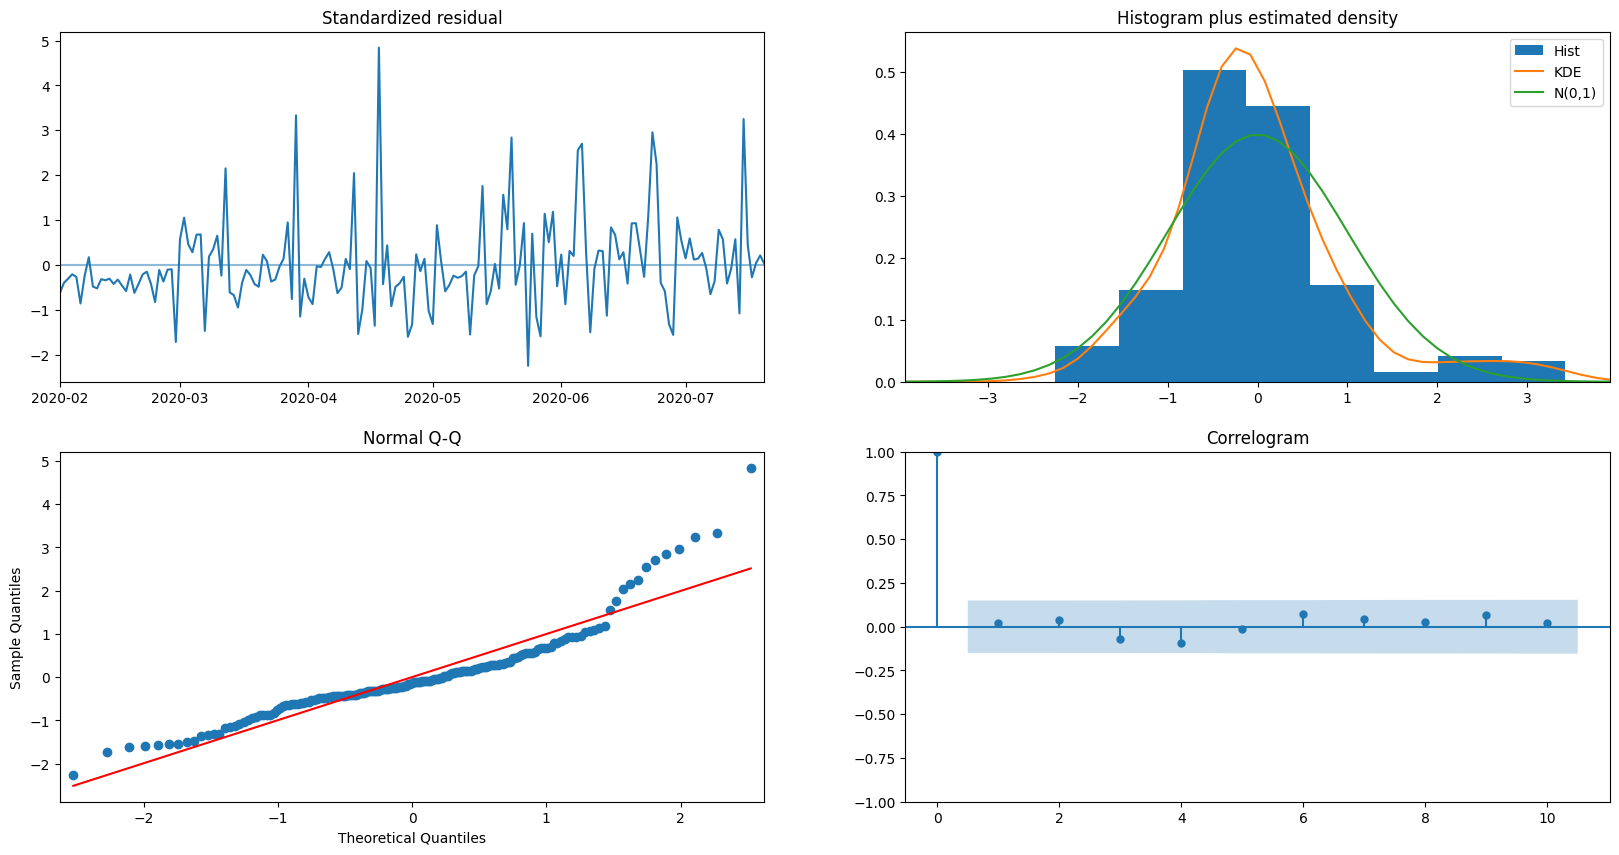

In [16]:
arima.plot_diagnostics(figsize=(20,10))
plt.show()

<Axes: xlabel='timestamp'>

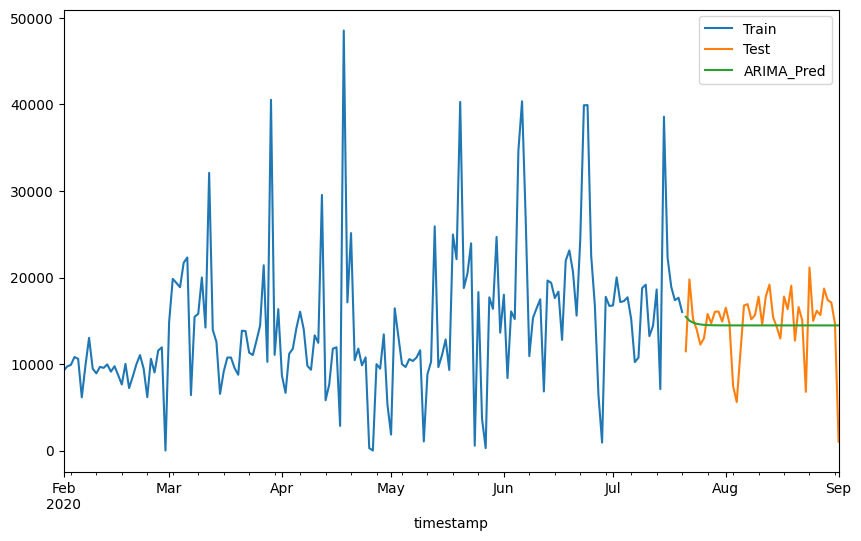

In [17]:
pred = arima.predict(n_periods = len(test_df) ) # set number of periods
train_df.plot(legend = True,label = 'Train', figsize=(10,6))
test_df.plot(legend = True,label = 'Test')
pred.plot(legend = True,label = 'ARIMA_Pred')

In [18]:
df.columns

Index(['Unnamed: 0', 'TP2', 'TP3', 'H1', 'DV_pressure', 'Reservoirs',
       'Oil_temperature', 'Motor_current', 'COMP', 'DV_eletric', 'Towers',
       'MPG', 'LPS', 'Pressure_switch', 'Oil_level', 'Caudal_impulses'],
      dtype='object')

In [19]:
df2 = df[['TP2','TP3','H1','DV_pressure','Reservoirs','Oil_temperature', 'COMP', 'DV_eletric', 'MPG']]


In [61]:
train_df.shape

(4092,)

In [62]:
test_df.shape

(1024,)

In [20]:
df_exo = df2.resample('D').sum().iloc[:,1:]        # Adding exogenous variable into our ARIMA model DAILY BASIS
exo_train = df_exo[:171]
exo_test = df_exo[171:]



In [21]:
df_exo.shape

(214, 8)

In [22]:
len(df_exo)

214

In [23]:
print(exo_train.shape)
print(exo_test.shape)

(171, 8)
(43, 8)


In [24]:
model = ARIMA(train_df,exog = exo_train, order = (2,0,0)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:          Motor_current   No. Observations:                  171
Model:                 ARIMA(3, 0, 1)   Log Likelihood               -1453.299
Date:                Sat, 16 Sep 2023   AIC                           2934.599
Time:                        16:58:03   BIC                           2978.582
Sample:                    02-01-2020   HQIC                          2952.445
                         - 07-20-2020                                         
Covariance Type:                  opg                                         
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             317.7049    393.203      0.808      0.419    -452.958    1088.368
TP3                58.1012     21.731      2.674      0.008      15.508     100.694
H1                 -1.4591      0.162     -9.004      0.000      -1.777      -1.141
DV_pressure        -0.4737      0.104     -4.572      0.000      -0.677      -0.271
Reservoirs        -58.0367     21.719     -2.672      0.008    -100.604     -15.469
Oil_temperature     0.0639      0.006     10.622      0.000       0.052       0.076
COMP               15.4112      1.855      8.306      0.000      11.775      19.048
DV_eletric          1.1210      1.341      0.836      0.403      -1.507       3.749
MPG                -5.4440      1.614     -3.374      0.001      -8.607      -2.282
ar.L1               0.2606      0.750      0.348      0.728      -1.209       1.730
ar.L2               0.1315      0.363      0.362      0.717      -0.580       0.843
ar.L3               0.1412      0.107      1.317      0.188      -0.069       0.351
ma.L1               0.1596      0.763      0.209      0.834      -1.335       1.654
sigma2           1.428e+06      0.081   1.77e+07      0.000    1.43e+06    1.43e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                17.35
Prob(Q):                              0.90   Prob(JB):                         0.00
Heteroskedasticity (H):               1.30   Skew:                             0.24
Prob(H) (two-sided):                  0.32   Kurtosis:                         4.49
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 4.84e+23. Standard errors may be unstable.
"""

In [25]:
pred = model.predict(start = len(train_df), end = len(df_exo)-1, exog = exo_test)                    # start and end index
print("The RMSE is : "+ str(np.sqrt(mean_squared_error(test_df,pred))))

The RMSE is : 854.7357441631378


<Axes: xlabel='timestamp'>

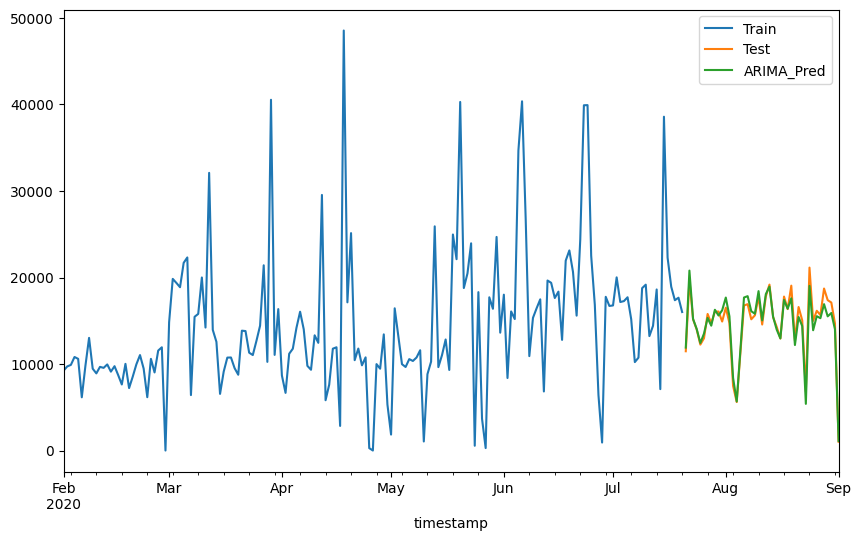

In [26]:
train_df.plot(legend = True,label = 'Train', figsize=(10,6))
test_df.plot(legend = True,label = 'Test')
pred.plot(legend = True,label = 'ARIMA_Pred')

In [27]:
mse = mean_squared_error(test_df, pred)
variance = np.var(test_df)
nmse = mse / variance
print(nmse)  # Normalised mean squared error

0.05091856324710553


#HOURLY BASIS [MOTOR CURRENT]


In [28]:
df = pd.read_csv('/content/drive/MyDrive/MetroPT3(AirCompressor).csv')

In [29]:
hour_mean = df1.resample('H')['Motor_current'].sum()

In [30]:
train_df = hour_mean.iloc[:int(len(hour_mean) * 0.8)]
test_df = hour_mean.iloc[int(len(hour_mean) * 0.8):]

In [31]:
print(train_df.shape)
print(test_df.shape)

(4092,)
(1024,)


In [32]:
from pmdarima.arima import auto_arima

arima = auto_arima(train_df,
                   trace=True,
                   error_action='ignore',
                   test='adf',
                   start_p=1,
                   start_q=1,
                   max_p=10,
                   max_q=10,
                   m=1,
                   D=0,
                   suppress_warnings=True,
                   stepwise=True,
                   seasonal=False)

arima.summary()

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=55586.784, Time=0.47 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=65853.290, Time=0.13 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=55623.153, Time=0.18 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=61826.366, Time=1.24 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=inf, Time=3.64 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=55585.680, Time=0.38 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=59681.515, Time=0.93 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=inf, Time=4.00 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=55585.238, Time=0.93 sec
 ARIMA(0,0,3)(0,0,0)[0]             : AIC=58417.102, Time=1.70 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=inf, Time=6.89 sec
 ARIMA(1,0,4)(0,0,0)[0]             : AIC=55562.328, Time=1.21 sec
 ARIMA(0,0,4)(0,0,0)[0]             : AIC=57635.879, Time=2.02 sec
 ARIMA(2,0,4)(0,0,0)[0]             : AIC=inf, Time=5.07 sec
 ARIMA(1,0,5)(0,0,0)[0]             : AIC=5

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 4092
Model:               SARIMAX(1, 0, 5)   Log Likelihood              -27717.317
Date:                Sat, 16 Sep 2023   AIC                          55450.633
Time:                        17:02:01   BIC                          55501.168
Sample:                    02-01-2020   HQIC                         55468.526
                         - 07-20-2020                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     60.9899      8.087      7.541      0.000      45.139      76.841
ar.L1          0.9014      0.011     85.207      0.000       0.881       0.922
ma.L1         -0.0696      0.012     -5.630      0.000      -0.094      -0.045
ma.L2          0.0058      0.018      0.325      0.745      -0.029       0.041
ma.L3          0.0196      0.017      1.169      0.243      -0.013       0.053
ma.L4         -0.0372      0.012     -2.985      0.003      -0.062      -0.013
ma.L5         -0.0379      0.017     -2.173      0.030      -0.072      -0.004
sigma2      4.488e+04    498.094     90.109      0.000    4.39e+04    4.59e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             27728.66
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               1.22   Skew:                             0.17
Prob(H) (two-sided):                  0.00   Kurtosis:                        15.75
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

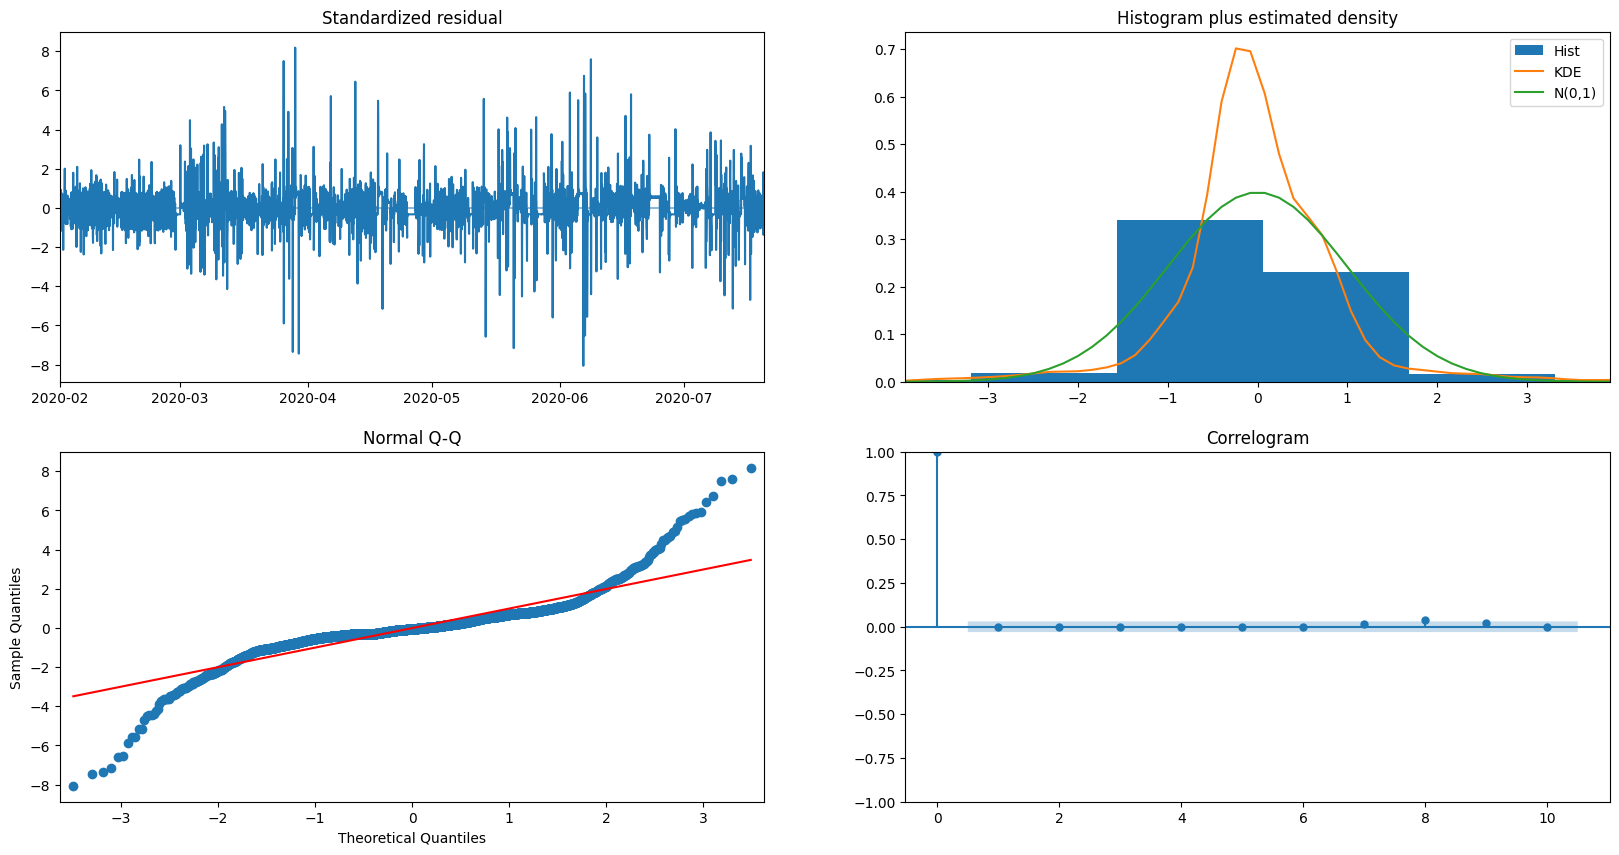

In [33]:
arima.plot_diagnostics(figsize=(20,10))
plt.show()

<Axes: xlabel='timestamp'>

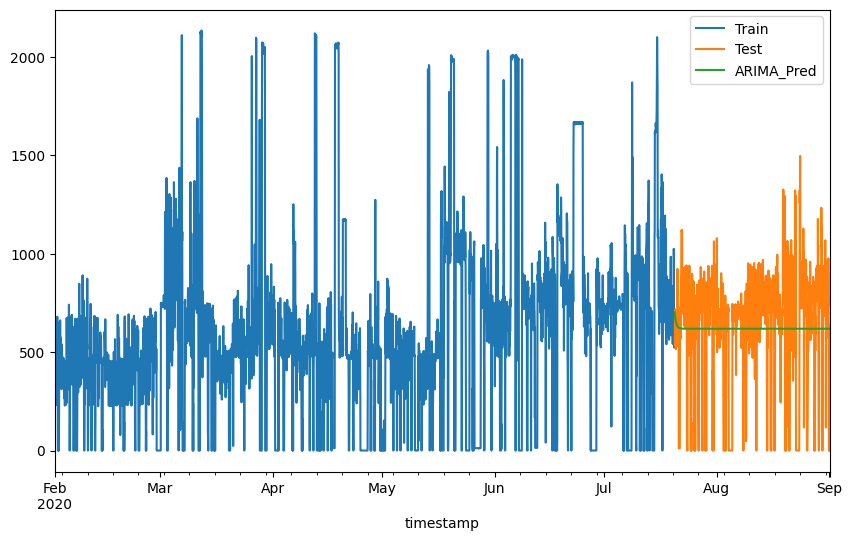

In [35]:
pred = arima.predict(n_periods = len(test_df) ) # set number of periods
train_df.plot(legend = True,label = 'Train', figsize=(10,6))
test_df.plot(legend = True,label = 'Test')
pred.plot(legend = True,label = 'ARIMA_Pred')

In [90]:
df.columns

Index(['Unnamed: 0', 'timestamp', 'TP2', 'TP3', 'H1', 'DV_pressure',
       'Reservoirs', 'Oil_temperature', 'Motor_current', 'COMP', 'DV_eletric',
       'Towers', 'MPG', 'LPS', 'Pressure_switch', 'Oil_level',
       'Caudal_impulses'],
      dtype='object')

In [96]:
df = pd.read_csv('/content/drive/MyDrive/MetroPT3(AirCompressor).csv')

In [97]:
df2 = df[['timestamp','TP2','TP3','H1','DV_pressure','Reservoirs','Oil_temperature', 'COMP', 'DV_eletric', 'MPG']]


In [98]:
df2.head()

,timestamp,TP2,TP3,H1,DV_pressure,Reservoirs,Oil_temperature,COMP,DV_eletric,MPG
0,2020-02-01 00:00:00,-0.012,9.358,9.340,-0.024,9.358,53.600,1.0,0.0,1.0
1,2020-02-01 00:00:10,-0.014,9.348,9.332,-0.022,9.348,53.675,1.0,0.0,1.0
2,2020-02-01 00:00:19,-0.012,9.338,9.322,-0.022,9.338,53.600,1.0,0.0,1.0
3,2020-02-01 00:00:29,-0.012,9.328,9.312,-0.022,9.328,53.425,1.0,0.0,1.0
4,2020-02-01 00:00:39,-0.012,9.318,9.302,-0.022,9.318,53.475,1.0,0.0,1.0


In [99]:
df2['timestamp'] = pd.to_datetime(df2['timestamp'])
df2 = df2.set_index('timestamp')


<ipython-input-99-2a6faf48d3d1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['timestamp'] = pd.to_datetime(df2['timestamp'])


In [100]:
train_df = hour_mean.iloc[: int(len(hour_mean) * 0.8)]
test_df = hour_mean.iloc[int(len(hour_mean) * 0.8):]

In [129]:
train_df.head()

timestamp
2020-02-01 00:00:00    326.6425
2020-02-01 01:00:00    366.4025
2020-02-01 02:00:00    465.1275
2020-02-01 03:00:00    467.0450
2020-02-01 04:00:00    460.7225
Freq: H, Name: Motor_current, dtype: float64

In [101]:
train_df.shape

(4092,)

In [102]:
test_df.shape

(1024,)

In [103]:
df_exo = df2.resample('H').sum().iloc[:, 1:]      # Adding exogenous variable into our ARIMA model DAILY BASIS

In [138]:
df_exo.shape

(5116, 8)

In [147]:

exo_test = df_exo[4092:]
exo_train = df_exo[:4092]

In [148]:
df_exo.shape

(5116, 8)

In [149]:
len(df_exo)

5116

In [150]:
print(exo_train.shape)
print(exo_test.shape)

(4092, 8)
(1024, 8)


In [151]:
print(train_df.shape)
print(exo_train.shape)

(4092,)
(4092, 8)


In [152]:
model = ARIMA(train_df,exog = exo_train, order = (1,0,5)).fit()


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [153]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:          Motor_current   No. Observations:                 4092
Model:                 ARIMA(1, 0, 5)   Log Likelihood              -24110.814
Date:                Sat, 16 Sep 2023   AIC                          48253.627
Time:                        18:29:02   BIC                          48354.696
Sample:                    02-01-2020   HQIC                         48289.412
                         - 07-20-2020                                         
Covariance Type:                  opg                                         
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1487      9.858      0.015      0.988     -19.172      19.469
TP3                45.4457      4.686      9.698      0.000      36.261      54.630
H1                 -0.7944      0.019    -41.845      0.000      -0.832      -0.757
DV_pressure         0.0124      0.038      0.324      0.746      -0.063       0.088
Reservoirs        -45.1557      4.690     -9.629      0.000     -54.347     -35.964
Oil_temperature     0.0546      0.001     37.674      0.000       0.052       0.057
COMP                7.7145      0.102     75.614      0.000       7.515       7.914
DV_eletric         -0.7549      0.116     -6.522      0.000      -0.982      -0.528
MPG                -5.0858      0.161    -31.676      0.000      -5.401      -4.771
ar.L1               0.9247      0.010     90.273      0.000       0.905       0.945
ma.L1              -0.6208      0.012    -50.321      0.000      -0.645      -0.597
ma.L2               0.0366      0.013      2.917      0.004       0.012       0.061
ma.L3              -0.0110      0.016     -0.706      0.480      -0.042       0.020
ma.L4              -0.0794      0.015     -5.147      0.000      -0.110      -0.049
ma.L5               0.0337      0.016      2.051      0.040       0.001       0.066
sigma2           7887.8510    115.828     68.100      0.000    7660.833    8114.869
===================================================================================
Ljung-Box (L1) (Q):                   1.91   Jarque-Bera (JB):            112494.89
Prob(Q):                              0.17   Prob(JB):                         0.00
Heteroskedasticity (H):               1.04   Skew:                            -1.73
Prob(H) (two-sided):                  0.45   Kurtosis:                        28.45
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [154]:
pred = model.predict(start = len(train_df), end = len(df_exo)-1, exog = exo_test)                    # start and end index
print("The RMSE is : "+ str(np.sqrt(mean_squared_error(test_df,pred))))

The RMSE is : 95.62221377632387


<Axes: xlabel='timestamp'>

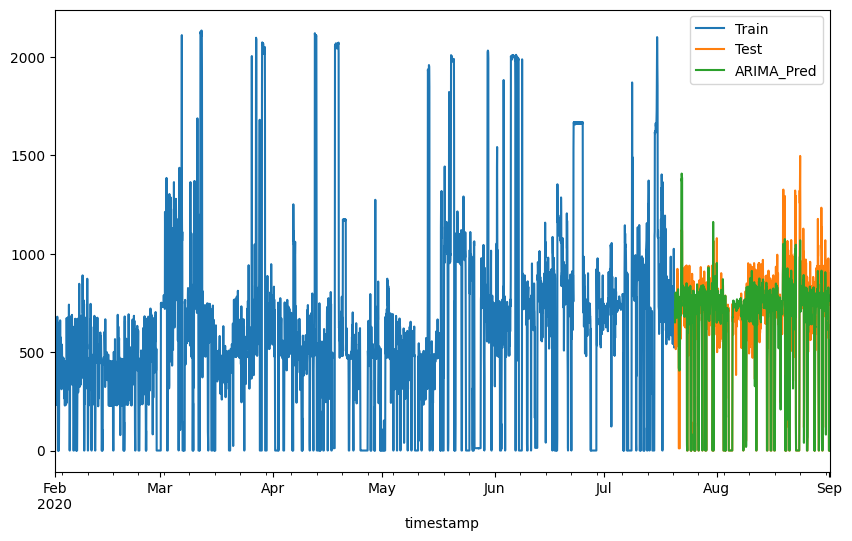

In [155]:
train_df.plot(legend = True,label = 'Train', figsize=(10,6))
test_df.plot(legend = True,label = 'Test')
pred.plot(legend = True,label = 'ARIMA_Pred')

In [156]:
mse = mean_squared_error(test_df, pred)
variance = np.var(test_df)
nmse = mse / variance
print(nmse)  # Normalised mean squared error

0.09675309176862336
